In [3]:

%matplotlib inline
import math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

Вероятность обнаружения исследуемой характеристики в указанном диапазоне равна (поле допуска) составляет 0.8063990308287804
193601.0 дефекта на миллион возможностей
Индекс воспроизводимости равен 0.43


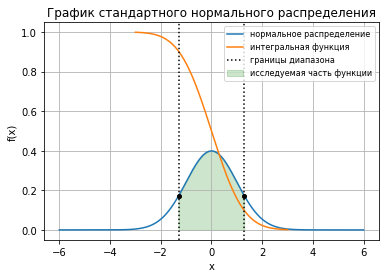

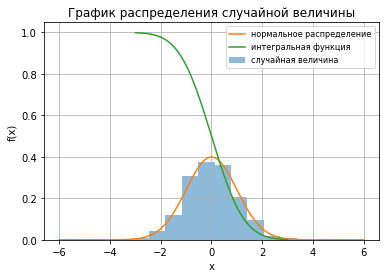

In [234]:
#        Модель для решения и графического отбражения вероятности 
#        обнаружения исследуемой характеристики в указанном диапазоне
#        и с заданными параметрами математического ожидания и средневадратичного отклонения

#Нижняя граница диапазона
range_1 = -1.3
#Верхняя граница диапазона
range_2 = 1.3
#Математическое ожидание
Expected_Value = 0  
#Среднеквадратическое отклонение
Standart_Deviation = 1     
x_axis = np.arange(-6, 6, 0.001)
plt.plot(x_axis, norm.pdf(x_axis,Expected_Value, Standart_Deviation), label = 'нормальное распределение')
plt.grid(axis = 'both')

def Integral(x):
    i1 = quad((lambda x:math.exp((-(x * x))/(2))), x, np.inf)
    return i1[0]

def Normal_Distribution(x):
    y = (1/math.sqrt(math.pi * 2)) * Integral(x)
    return y

#доля генеральной совокупности, подчиняющейся нормальному распределению
quantum_of_total_combination = Normal_Distribution(range_1) - Normal_Distribution(range_2)
print("Вероятность обнаружения исследуемой характеристики в указанном диапазоне равна (поле допуска) составляет", quantum_of_total_combination)
quantum_of_defects = round(quantum_of_total_combination, 9)*1000000
print(round(1000000 - quantum_of_defects, 1), "дефекта на миллион возможностей")
index_of_reproducibility = (math.fabs(range_1) + math.fabs(range_2)) / 6
print("Индекс воспроизводимости равен", round(index_of_reproducibility,2))

a = -3
v = []
w = []
while (a < 3):
    a += 0.001
    v.append(a)
    y = Normal_Distribution(a)
    w.append(y)
plt.plot(v, w, label = 'интегральная функция')



px=np.arange(range_1,range_2,0.01)
plt.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.2, color='green', label = "исследуемая часть функции")
plt.axvline(range_1, 0, 1, color = "black", linestyle = ':')
plt.axvline(range_2, 0, 1, color = "black", linestyle = ':', label = "границы диапазона")
plt.xlabel('x')
plt.ylabel('f(x)')
xplot1 = plt.plot(range_1,norm.pdf(range_1), marker = "o", markersize=4, color="black")
xplot1 = plt.plot(range_2,norm.pdf(range_2), marker = "o", markersize=4, color="black")
#plt.hist(xs, bins=10, alpha=0.3, density=True, color = 'red')
plt.legend(fontsize = '8')
plt.title("График стандартного нормального распределения")

plt.show()

fig, ax = plt.subplots()
xs = norm.rvs(scale=1,size=1000)
ax.hist(xs, bins=10, alpha=0.5, density=True, label = 'случайная величина')
ax.plot(x_axis, norm.pdf(x_axis,Expected_Value, Standart_Deviation), label = 'нормальное распределение')
plt.plot(v, w, label = 'интегральная функция')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend(fontsize = '8')
ax.set_title("График распределения случайной величины")
ax.grid(True)

